# 1. Download the dataset: Dataset

# 2. Load the dataset.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
file=pd.read_csv("Mall_Customers.csv")
df=pd.DataFrame(file)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df['Gender'] = df['Gender'].astype('category')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Perform Below Visualizations.
# ● Univariate Analysis
# ● Bi - Variate Analysis
# ● Multi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


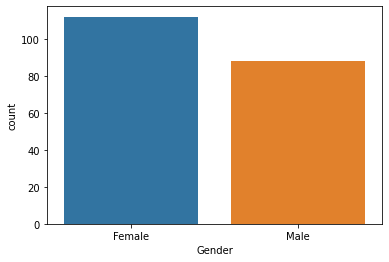

In [19]:
import seaborn as sns
sns.countplot(df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


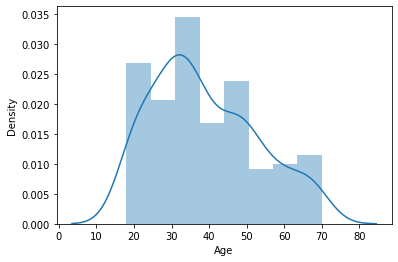

In [24]:
sns.distplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


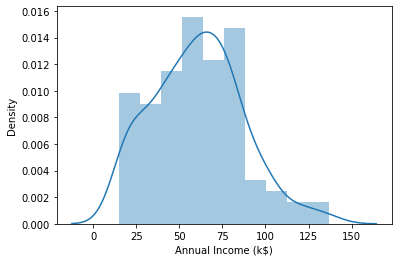

In [21]:
sns.distplot(df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


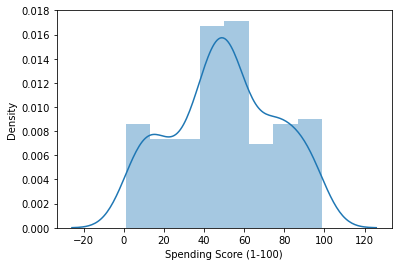

In [22]:
sns.distplot(df['Spending Score (1-100)'])

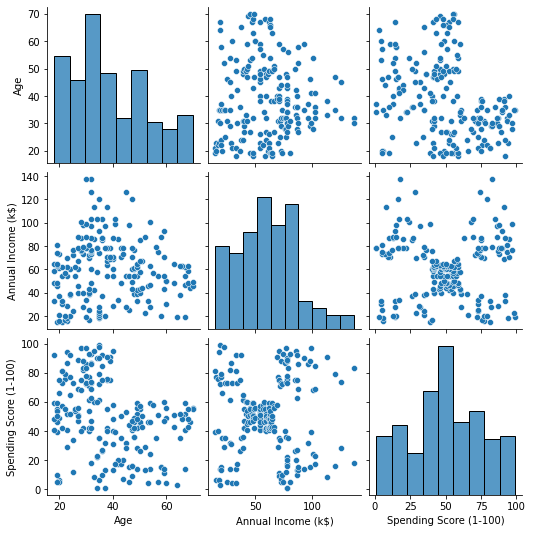

In [25]:
sns.pairplot(df[[ 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])

# 4. Perform descriptive statistics on the dataset.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Gender                  200 non-null    category
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 6.7 KB


In [28]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [30]:
df.shape

(200, 5)

# 5. Handle the Missing values.

In [31]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### there is no missing values in dataset

In [32]:
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        print("unique of "+i+" is "+str(len(set(df[i])))+" they are "+str(set(df[i])))

unique of Gender is 2 they are {'Female', 'Male'}


# 6. Find the outliers and replace the outliers

## Checking for outliers

In [33]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)

# of Bivariate Outliers: 200


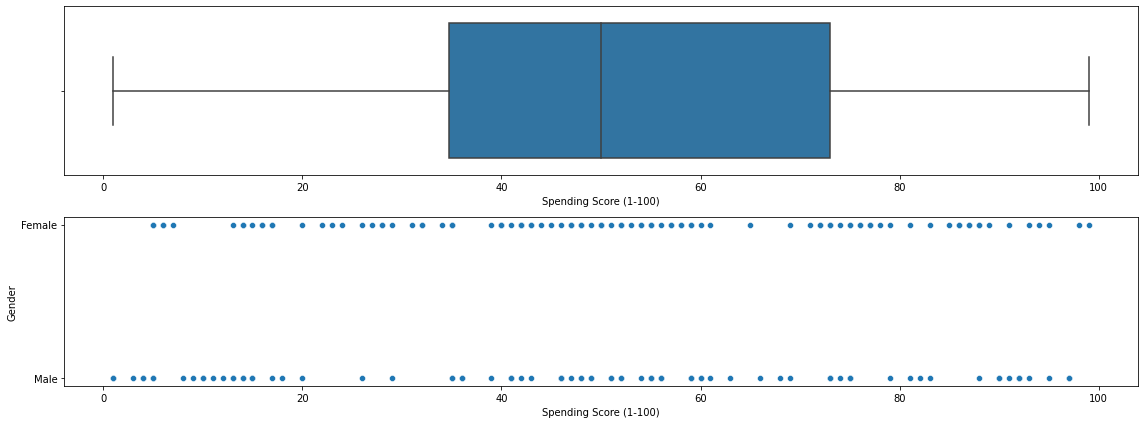

In [43]:
box_scatter(df,'Spending Score (1-100)','Gender');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Spending Score (1-100)'] < 400])}")

# of Bivariate Outliers: 38


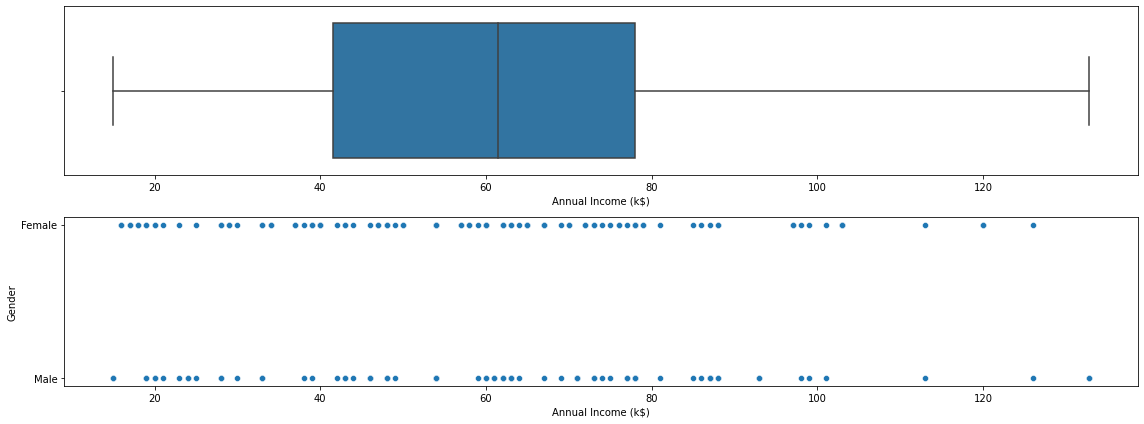

In [59]:
box_scatter(df,'Annual Income (k$)','Gender');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Annual Income (k$)'] > 80])}")

# of Bivariate Outliers: 40


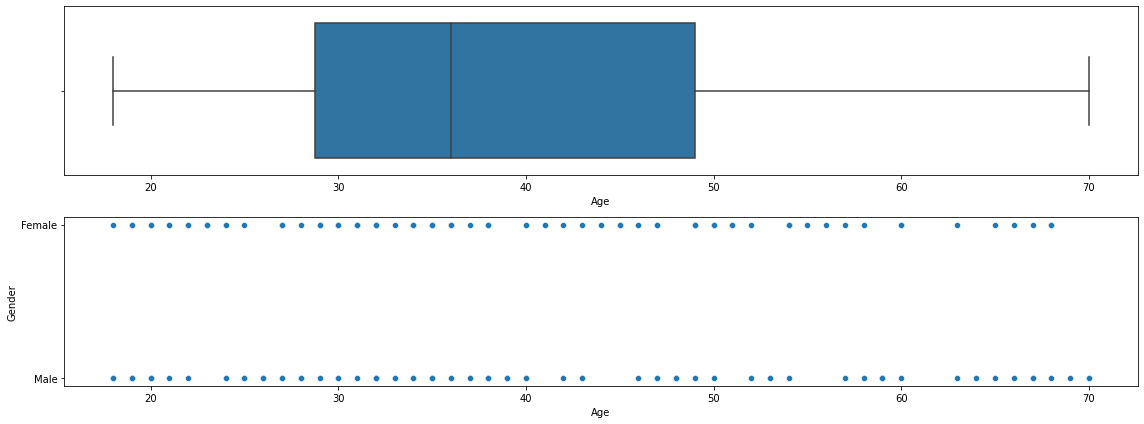

In [54]:
box_scatter(df,'Age','Gender');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 50])}")

## Removing outliers

In [55]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])
        

## After removing outliers, boxplot will be like

# of Bivariate Outliers: 200


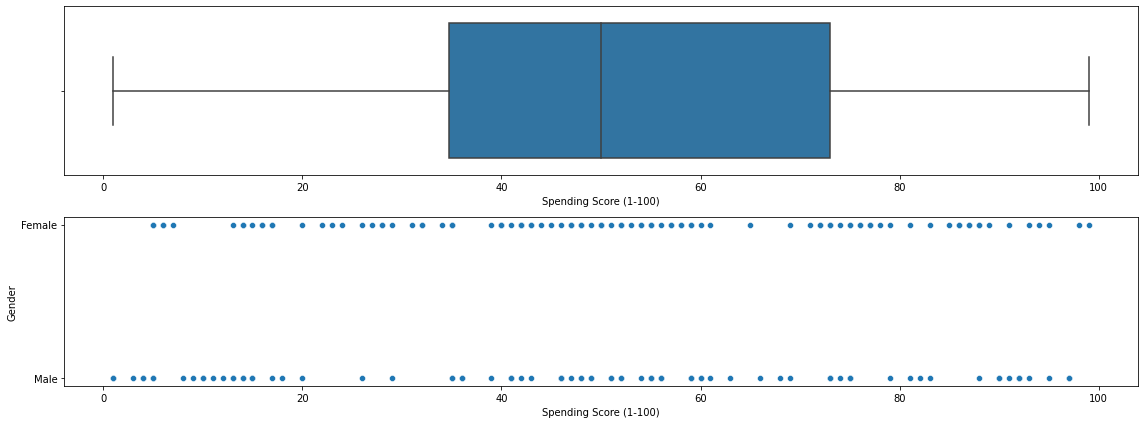

In [56]:
box_scatter(df,'Spending Score (1-100)','Gender');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Spending Score (1-100)'] < 400])}")

# of Bivariate Outliers: 38


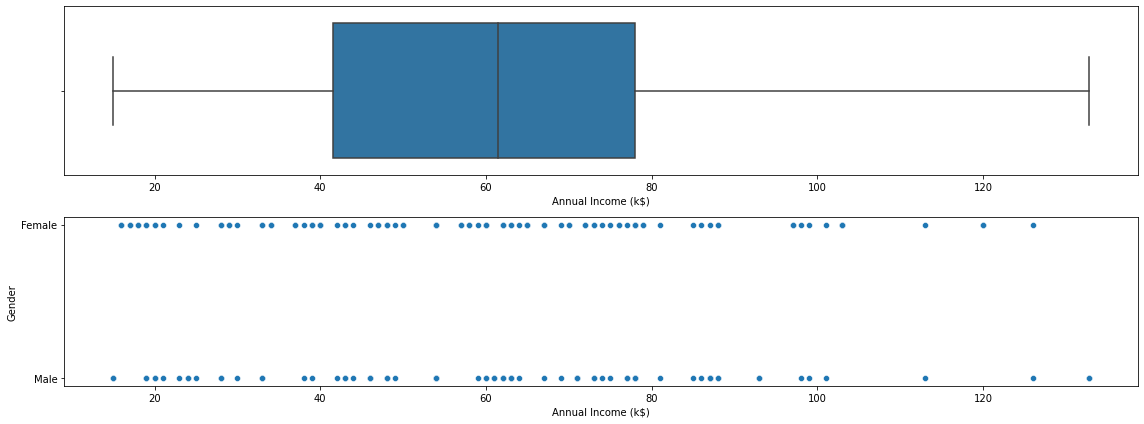

In [60]:
box_scatter(df,'Annual Income (k$)','Gender');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Annual Income (k$)'] > 80])}")

# of Bivariate Outliers: 40


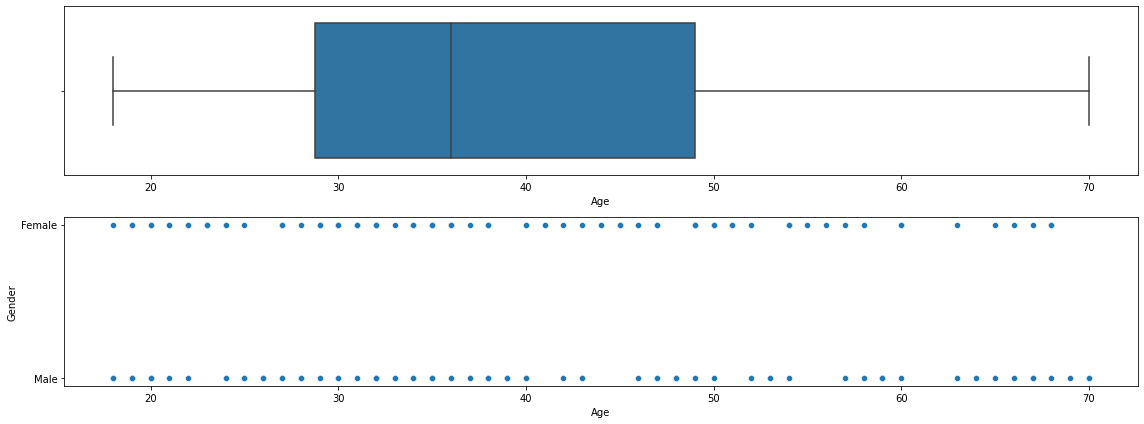

In [62]:
box_scatter(df,'Age','Gender');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(df.loc[df['Age'] > 50])}")

# 7. Check for Categorical columns and perform encoding.

In [63]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df:
    if df[i].dtype=='object' or df[i].dtype=='category':
        df[i]=encoder.fit_transform(df[i])

# 8. Scale the independent variables

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [76]:
x

array([[-1.7234121 ,  1.12815215, -1.42456879, -1.74542941],
       [-1.70609137,  1.12815215, -1.28103541, -1.74542941],
       [-1.68877065, -0.88640526, -1.3528021 , -1.70708307],
       [-1.67144992, -0.88640526, -1.13750203, -1.70708307],
       [-1.6541292 , -0.88640526, -0.56336851, -1.66873673],
       [-1.63680847, -0.88640526, -1.20926872, -1.66873673],
       [-1.61948775, -0.88640526, -0.27630176, -1.6303904 ],
       [-1.60216702, -0.88640526, -1.13750203, -1.6303904 ],
       [-1.5848463 ,  1.12815215,  1.80493225, -1.59204406],
       [-1.56752558, -0.88640526, -0.6351352 , -1.59204406],
       [-1.55020485,  1.12815215,  2.02023231, -1.59204406],
       [-1.53288413, -0.88640526, -0.27630176, -1.59204406],
       [-1.5155634 , -0.88640526,  1.37433211, -1.55369772],
       [-1.49824268, -0.88640526, -1.06573534, -1.55369772],
       [-1.48092195,  1.12815215, -0.13276838, -1.55369772],
       [-1.46360123,  1.12815215, -1.20926872, -1.55369772],
       [-1.4462805 , -0.

#9. Perform any of the clustering algorithms
#10. Add the cluster data with the primary dataset

## K Means Clustering

# 11. Split the data into dependent and independent variables.

In [71]:
x=df.iloc[:,:-1]
x.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1.0,1,19.0,15.0
1,2.0,1,21.0,15.0
2,3.0,0,20.0,16.0
3,4.0,0,23.0,16.0
4,5.0,0,31.0,17.0


In [74]:
y=df.iloc[:,-1]
y.head()

0    39.0
1    81.0
2     6.0
3    77.0
4    40.0
Name: Spending Score (1-100), dtype: float64

# 12. Split the data into training and testing

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [80]:
x_train.shape

(134, 4)

In [81]:
x_test.shape

(66, 4)

In [82]:
y_train.shape

(134,)

In [83]:
y_test.shape

(66,)

#13. Build the Model
#14. Train the Model
#15. Test the Model
#16. Measure the performance using Evaluation Metrics.

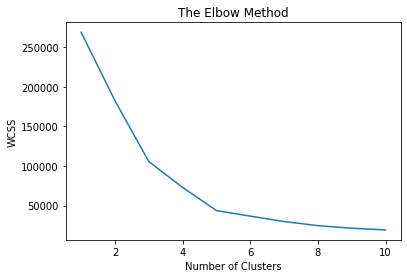

In [77]:
data=df.iloc[:,[3,4]].values
from sklearn.cluster import KMeans
wcss=[] # within cluster sum of square
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) #inertia_ = to find the wcss value

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

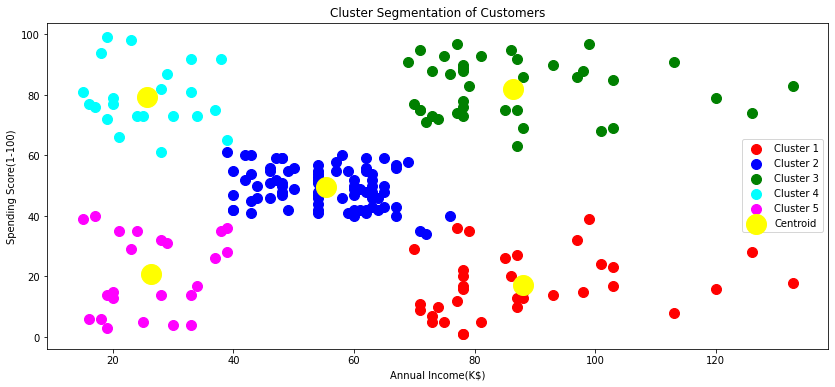

In [78]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(data)

#plotting the the clusters
fig,ax = plt.subplots(figsize=(14,6))
ax.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
ax.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
ax.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=100,c='green',label='Cluster 3')
ax.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=100,c='cyan',label='Cluster 4')
ax.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=100,c='magenta',label='Cluster 5')

ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=400,c='yellow',label='Centroid')
plt.title('Cluster Segmentation of Customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()